<a href="https://colab.research.google.com/github/ikzubill/TrabajoSistemasDistribuidos/blob/main/Trabajo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Técnicas para la Ciencia de Datos
#### Iker Zubillaga Ruiz


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import graphviz
from sklearn import tree

 ## Problema planteado
 Voy a realizar un informe sobre un conjunto de datos correspondiente a los jugadores del juego EA Sports FC 24. Se tratará de buscar conclusiones sobre los datos aplicando técnicas de Machine Learning. Además, se intentará realizar una agrupación efectiva de los jugadores (clustering), con el fin de poder clasificar a los jugadores por su posición.

 ## Datos recogidos
Se recogen datos con información sobre los jugadores del juego EA Sports FC 24. Este csv se ha obtenido de Kaggle: https://www.kaggle.com/datasets/stefanoleone992/ea-sports-fc-24-complete-player-dataset

In [ ]:
file_name = 'male_players.csv'
df = pd.read_csv(file_name)
df.head(20)

<ipython-input-326-b871d56ea0eb>:2: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name)


,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,231747,/player/231747/kylian-mbappe/240002,24.0,2.0,2023-09-22,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,...,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3
1,239085,/player/239085/erling-haaland/240002,24.0,2.0,2023-09-22,E. Haaland,Erling Braut Haaland,ST,91,94,...,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
2,192985,/player/192985/kevin-de-bruyne/240002,24.0,2.0,2023-09-22,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,...,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
3,158023,/player/158023/lionel-messi/240002,24.0,2.0,2023-09-22,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,...,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3
4,165153,/player/165153/karim-benzema/240002,24.0,2.0,2023-09-22,K. Benzema,Karim Benzema,"CF, ST",90,90,...,64+3,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3
5,188545,/player/188545/robert-lewandowski/240002,24.0,2.0,2023-09-22,R. Lewandowski,Robert Lewandowski,ST,90,90,...,66+3,66+3,66+3,65+3,61+3,61+3,61+3,61+3,61+3,19+3
6,192119,/player/192119/thibaut-courtois/240002,24.0,2.0,2023-09-22,T. Courtois,Thibaut Nicolas Marc Courtois,GK,90,90,...,31+3,31+3,31+3,29+3,29+3,29+3,29+3,29+3,29+3,88+2
7,202126,/player/202126/harry-kane/240002,24.0,2.0,2023-09-22,H. Kane,Harry Kane,ST,90,90,...,69+3,69+3,69+3,67+3,64+3,63+3,63+3,63+3,64+3,20+3
8,238794,/player/238794/vinicius-jose-de-oliveira-junio...,24.0,2.0,2023-09-22,Vini Jr.,Vinícius José Paixão de Oliveira Júnior,LW,89,94,...,58+3,58+3,58+3,62+3,57+3,45+3,45+3,45+3,57+3,16+3
9,212831,/player/212831/alisson-ramses-becker/240002,24.0,2.0,2023-09-22,Alisson,Alisson Ramsés Becker,GK,89,90,...,39+3,39+3,39+3,34+3,33+3,33+3,33+3,33+3,33+3,87+3


In [ ]:
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

El dataset tiene 180021 filas y 109 columnas.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180021 entries, 0 to 180020
Columns: 109 entries, player_id to gk
dtypes: float64(20), int64(43), object(46)
memory usage: 149.7+ MB


In [ ]:
df.columns

Index(['player_id', 'player_url', 'fifa_version', 'fifa_update',
       'update_as_of', 'short_name', 'long_name', 'player_positions',
       'overall', 'potential',
       ...
       'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk'],
      dtype='object', length=109)

Creamos una nueva columna en la que solo nos quedamos con una de las posiciones en las que puede jugar el jugador. Esta primera posición es en teoría la posición que ocupa el futbolista más habitualmente.

In [ ]:
df['best_position'] = df['player_positions'].str.split(',').str.get(0)

In [ ]:
df.head(5)

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,best_position
0,231747,/player/231747/kylian-mbappe/240002,24.0,2.0,2023-09-22,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,...,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3,ST
1,239085,/player/239085/erling-haaland/240002,24.0,2.0,2023-09-22,E. Haaland,Erling Braut Haaland,ST,91,94,...,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3,ST
2,192985,/player/192985/kevin-de-bruyne/240002,24.0,2.0,2023-09-22,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,...,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3,CM
3,158023,/player/158023/lionel-messi/240002,24.0,2.0,2023-09-22,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,...,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3,CF
4,165153,/player/165153/karim-benzema/240002,24.0,2.0,2023-09-22,K. Benzema,Karim Benzema,"CF, ST",90,90,...,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3,CF


Eliminamos del dataset unas cuantas columnas que no vamos a tener en cuenta:

In [ ]:
to_drop = ['player_id', 'player_url', 'fifa_version', 'fifa_update', 'update_as_of', 'short_name', 'long_name', 'player_positions', 'dob', 'club_team_id', 'league_id', 'league_name', 'league_level', 'club_position','club_loaned_from', 'club_loaned_from', 'nationality_id', 'nation_team_id', 'nation_position', 'international_reputation', 'real_face','player_tags', 'player_traits', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb','ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk']
df.drop(columns=to_drop, inplace=True)

In [ ]:
df.columns

Index(['overall', 'potential', 'value_eur', 'wage_eur', 'age', 'height_cm',
       'weight_kg', 'club_name', 'club_jersey_number', 'club_joined_date',
       'club_contract_valid_until_year', 'nationality_name',
       'nation_jersey_number', 'preferred_foot', 'weak_foot', 'skill_moves',
       'work_rate', 'body_type', 'release_clause_eur', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'men

In [ ]:
df.head(5)

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_name,club_jersey_number,club_joined_date,...,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,best_position
0,91,94,181500000.0,230000.0,24,182,75,Paris Saint Germain,7.0,2018-07-01,...,26,34,32,13,5,7,11,6,NaN,ST
1,91,94,185000000.0,340000.0,22,195,94,Manchester City,9.0,2022-07-01,...,38,47,29,7,14,13,11,7,NaN,ST
2,91,91,103000000.0,350000.0,32,181,75,Manchester City,17.0,2015-08-30,...,66,70,53,15,13,5,10,13,NaN,CM
3,90,90,41000000.0,23000.0,36,169,67,Inter Miami,10.0,2023-07-16,...,20,35,24,6,11,15,14,8,NaN,CF
4,90,90,51000000.0,95000.0,35,185,81,Al Ittihad,9.0,2023-07-01,...,43,24,18,13,11,5,5,7,NaN,CF


Observamos los diferentes valores que se dan para las posiciones, es decir, las diferentes posiciones que existen.

In [ ]:
df['best_position'].unique()

array(['ST', 'CM', 'CF', 'GK', 'LW', 'CDM', 'CB', 'RW', 'CAM', 'RB', 'RM',
       'LB', 'LM', 'LWB', 'RWB'], dtype=object)

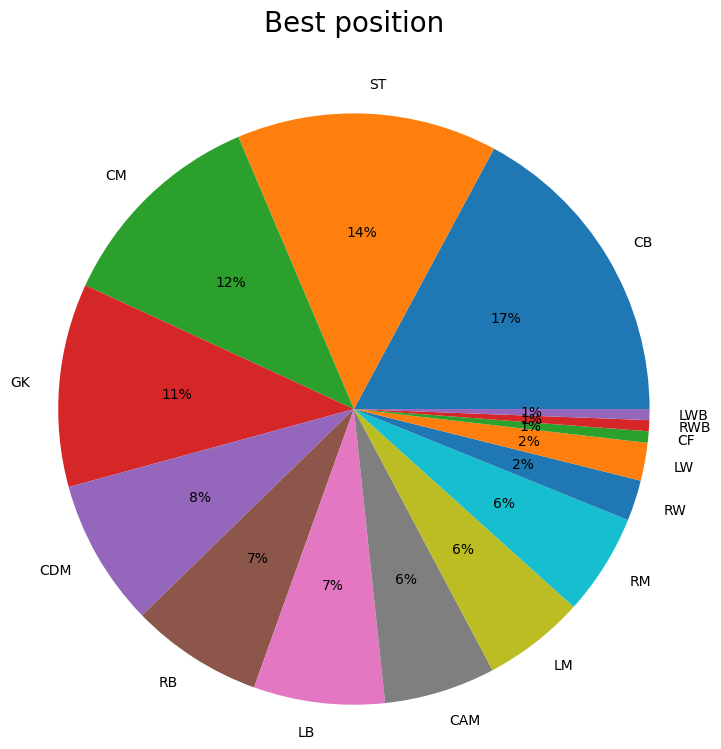

In [ ]:
df['best_position'].value_counts().plot.pie(autopct='%1.0f%%', radius=2, ylabel='')
plt.title('Best position', y=1.5, fontsize=20)
plt.show()

Agrupamos las posiciones con menos apariciones (son al mismo tiempo las más específicas en el fútbol) en otras posiciones más generales.

In [ ]:
df.loc[df['best_position'].isin(('CF', 'ST')),'best_position'] = 'ST'
df.loc[df['best_position'].isin(('LW', 'RW', 'LM', 'RM')),'best_position'] = 'WI'
df.loc[df['best_position'].isin(('RB', 'LB', 'RWB', 'LWB')),'best_position'] = 'FB'

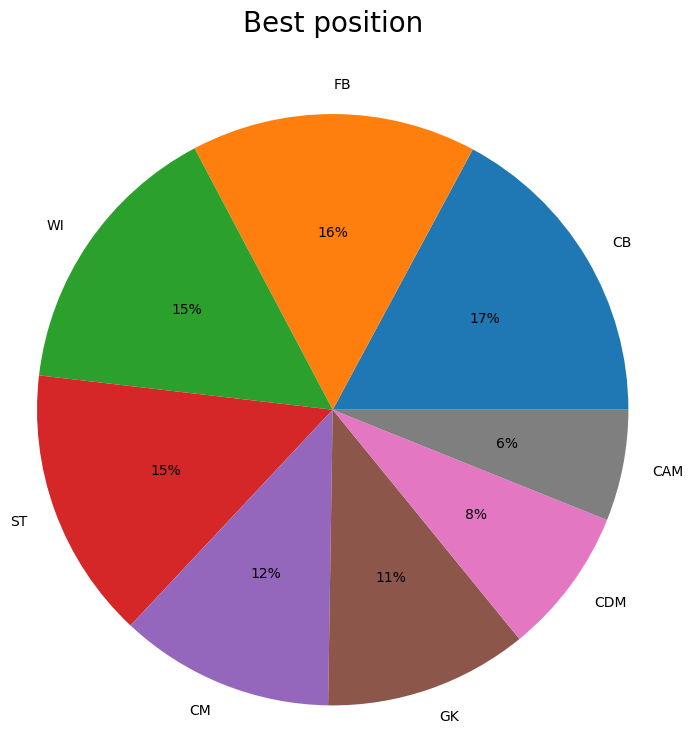

In [ ]:
df['best_position'].value_counts().plot.pie(autopct='%1.0f%%', radius=2, ylabel='')
plt.title('Best position', y=1.5, fontsize=20)
plt.show()

In [ ]:
df['best_position'].unique()

array(['ST', 'CM', 'GK', 'WI', 'CDM', 'CB', 'CAM', 'FB'], dtype=object)

Observamos un histograma en el que se puede ver el número de jugadores que existen por grupos de edades.

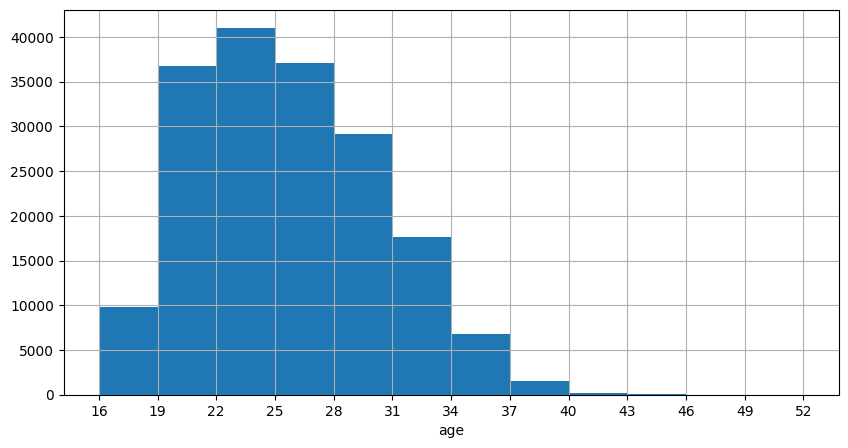

In [ ]:
# Defino los rangos.
no_bins = 10
min_bin_value = int(df['age'].min())
max_bin_value = int(df['age'].max()) + 1
no_data_points = df.shape[0]
predefined_bins = list(range(min_bin_value,max_bin_value,int((max_bin_value-min_bin_value)/no_bins)))

# Creo el histograma.
df['age'].hist(bins=predefined_bins, figsize=(10,5))

# Dibujo el histograma.
plt.xlabel('age')
plt.xticks(predefined_bins)
plt.show()

Ahora, vamos a observar mediante un diagrama de caja todas las columnas numéricas del DataFrame.

<Axes: >

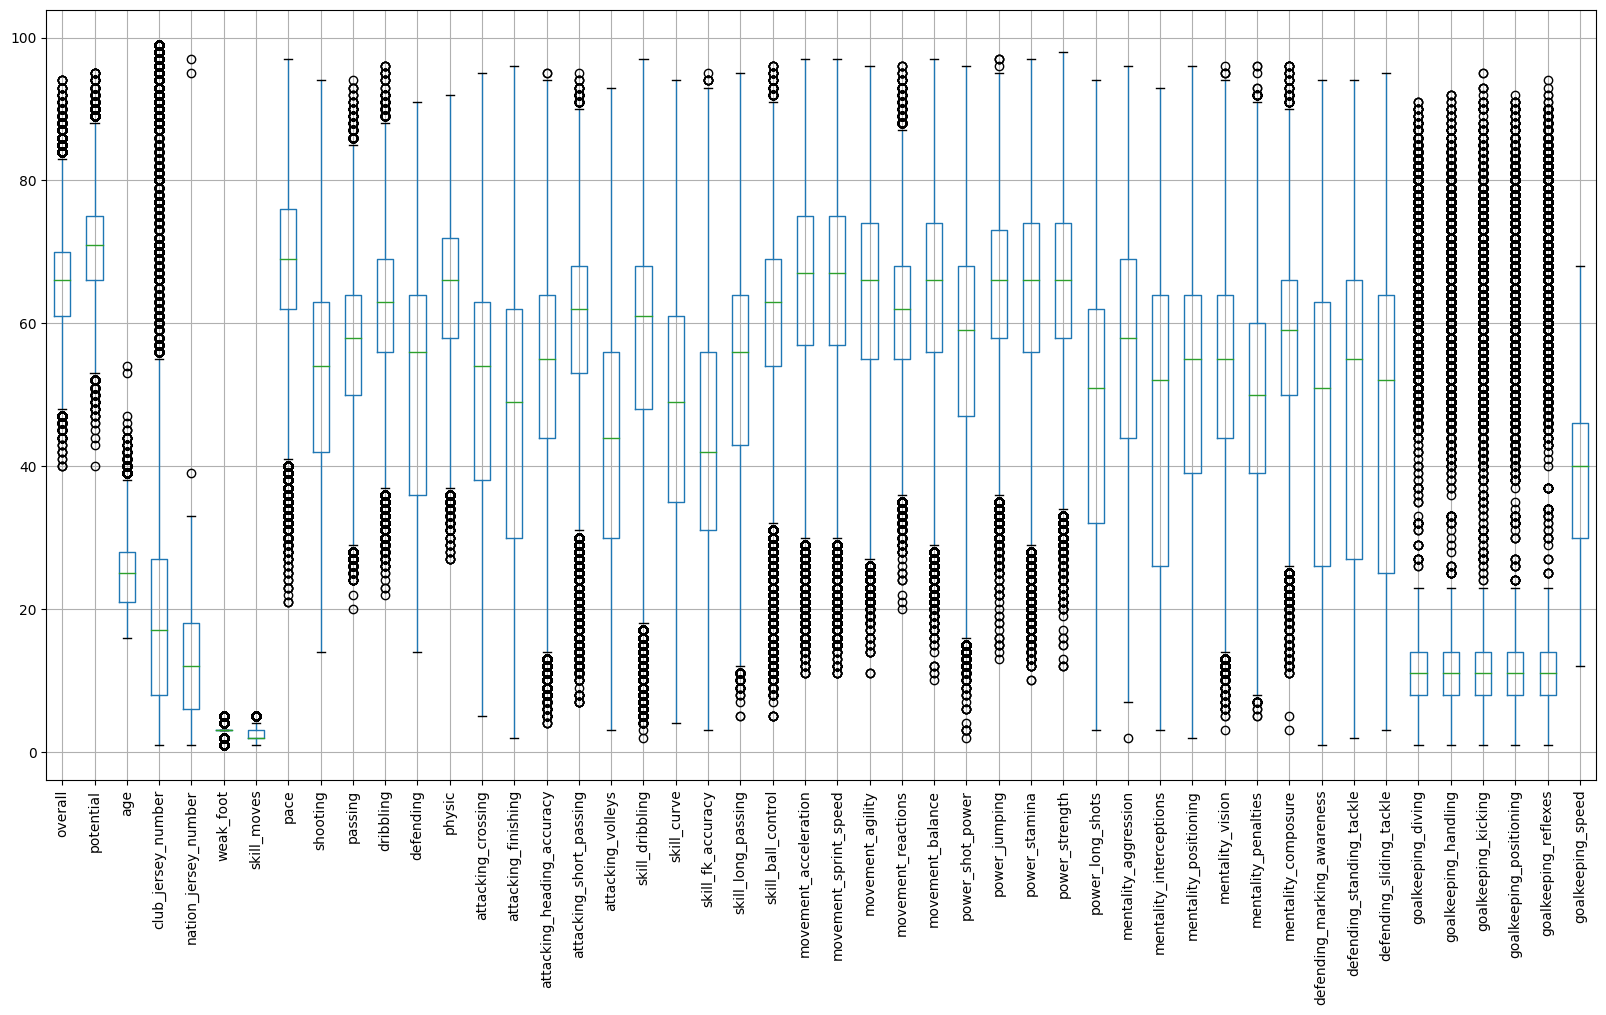

In [ ]:
#Elimino algunas filas ya que sus valores no están comprendidos entre 0 y 100.
db=df.drop(columns=['value_eur', 'wage_eur','release_clause_eur', 'club_contract_valid_until_year', 'height_cm', 'weight_kg'])

db.boxplot(rot=90, figsize=(20,10))

Observo el número de jugadores (por posición) que tienen poca habilidad con el balón en los pies.

In [ ]:
df[df["skill_ball_control"] < 40]["best_position"].value_counts()

GK     19901
CB      3226
FB       680
ST        15
CDM       14
CM        10
WI        10
CAM        3
Name: best_position, dtype: int64

Ahora, veo el número de jugadores diestros y zurdos en cada posición:

[Text(0.5, 0, 'Preferred foot of players in differet positions')]

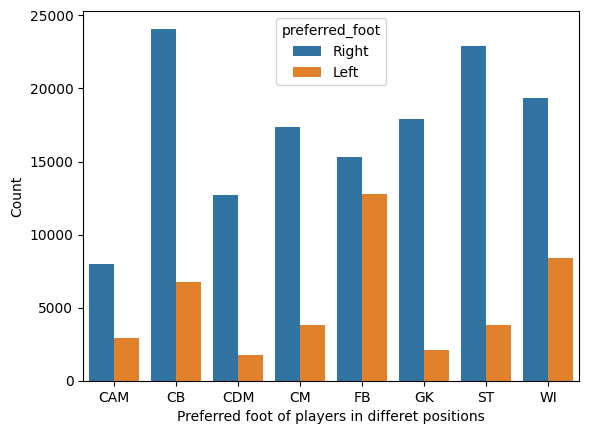

In [ ]:
dft = df.groupby("best_position")["preferred_foot"].value_counts().reset_index(name='Count')

p = sns.barplot(x='best_position', y='Count', data=dft, hue='preferred_foot')
p.legend(title='preferred_foot')
p.set(xlabel='Preferred foot of players in differet positions')

Con el siguiente gráfico se puede observar mejor el porcentaje de jugadores diestros y zurdos en cada posición:

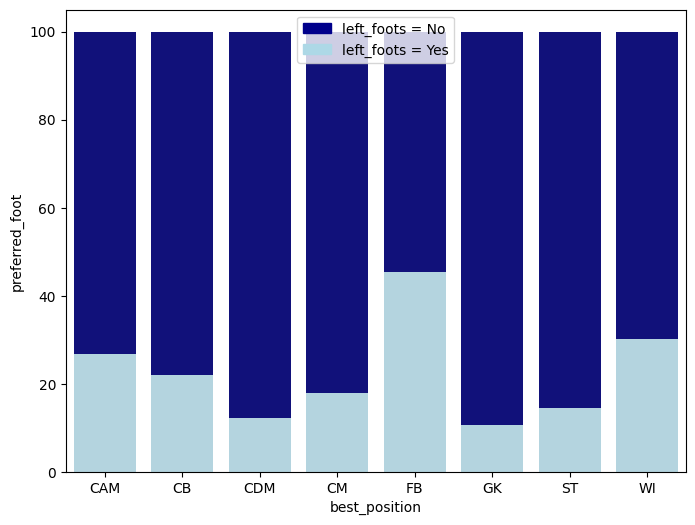

In [ ]:
plt.figure(figsize=(8, 6))

# Obtengo los porcentajes.
total = df.groupby('best_position')['preferred_foot'].count().reset_index()
left_foots = df[df.preferred_foot=='Left'].groupby('best_position')['preferred_foot'].count().reset_index()
left_foots['preferred_foot'] = [i / j * 100 for i,j in zip(left_foots['preferred_foot'], total['preferred_foot'])]
total['preferred_foot'] = [i / j * 100 for i,j in zip(total['preferred_foot'], total['preferred_foot'])]

# Creo el gráfico de barras.
bar1 = sns.barplot(x="best_position",  y="preferred_foot", data=total, color='darkblue')
bar2 = sns.barplot(x="best_position", y="preferred_foot", data=left_foots, color='lightblue')
top_bar = mpatches.Patch(color='darkblue', label='left_foots = No')
bottom_bar = mpatches.Patch(color='lightblue', label='left_foots = Yes')
plt.legend(handles=[top_bar, bottom_bar])

# Dibujo el gráfico de barras.
plt.show()

Observo la media de edad por posición:

In [ ]:
df.groupby("best_position")["age"].mean()

best_position
CAM    24.421918
CB     25.735621
CDM    25.808636
CM     24.512448
FB     25.105044
GK     26.104669
ST     25.042772
WI     24.314154
Name: age, dtype: float64

Ahora, vuelvo a observar el número de filas y columnas.

In [ ]:
df.shape

(180021, 61)

Observamos el número de valores nulos en cada una de las columnas del dataset:

In [ ]:
for col_name in list(df.columns):
    no_null_values = sum(df[col_name].isnull())
    if no_null_values:
        print('Número de valores nulos en la columna %s is %d' %(col_name,no_null_values))

Número de valores nulos en la columna value_eur is 2153
Número de valores nulos en la columna wage_eur is 1848
Número de valores nulos en la columna club_name is 1865
Número de valores nulos en la columna club_jersey_number is 1865
Número de valores nulos en la columna club_joined_date is 12588
Número de valores nulos en la columna club_contract_valid_until_year is 1865
Número de valores nulos en la columna nation_jersey_number is 169923
Número de valores nulos en la columna release_clause_eur is 59299
Número de valores nulos en la columna pace is 20024
Número de valores nulos en la columna shooting is 20024
Número de valores nulos en la columna passing is 20024
Número de valores nulos en la columna dribbling is 20024
Número de valores nulos en la columna defending is 20024
Número de valores nulos en la columna physic is 20024
Número de valores nulos en la columna mentality_composure is 32888
Número de valores nulos en la columna goalkeeping_speed is 159997


Una vez hemos llegado a este punto, podríamos dar por finalizada la primera exploración de los datos recogidos. Después de haber visto que tenemos varias columnas que contienen valores nulos pasaremos a la sección del tratamiento de datos. Las transformaciones y tratamientos realizados en esta sección han sido mínimos y solo nos han servido para realizar una primera visualización global del dataset, por lo que he decidido no incluirlos en la siguiente sección.

 ## Tratamiento dado a los datos, incluyendo referencia a los formatos usados y las herramientas utilizadas
Como he comentado en la anterior sección, lo primero que necesitamos es eliminar los valores nulos de nuestro dataset, ya que sino no podremos introducir esos datos en el modelo que implementaremos más adelante para hacer el clustering.

In [ ]:
df.dropna(axis=1, inplace=True)

In [ ]:
print(f"Ahora, el dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

Ahora, el dataset tiene 180021 filas y 45 columnas.


Ahora, ire analizando otros atributos que siguen perteneciendo al dataset y que tengo que valorar si introducir en el modelo. Analizaré sobre todo las columnas que no son numéricas y trataré transformarlas en numéricas para introducirlas al modelo.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180021 entries, 0 to 180020
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   overall                      180021 non-null  int64 
 1   potential                    180021 non-null  int64 
 2   age                          180021 non-null  int64 
 3   height_cm                    180021 non-null  int64 
 4   weight_kg                    180021 non-null  int64 
 5   nationality_name             180021 non-null  object
 6   preferred_foot               180021 non-null  object
 7   weak_foot                    180021 non-null  int64 
 8   skill_moves                  180021 non-null  int64 
 9   work_rate                    180021 non-null  object
 10  body_type                    180021 non-null  object
 11  attacking_crossing           180021 non-null  int64 
 12  attacking_finishing          180021 non-null  int64 
 13  attacking_head

Empiezo observando la nacionalidad de los jugadores.

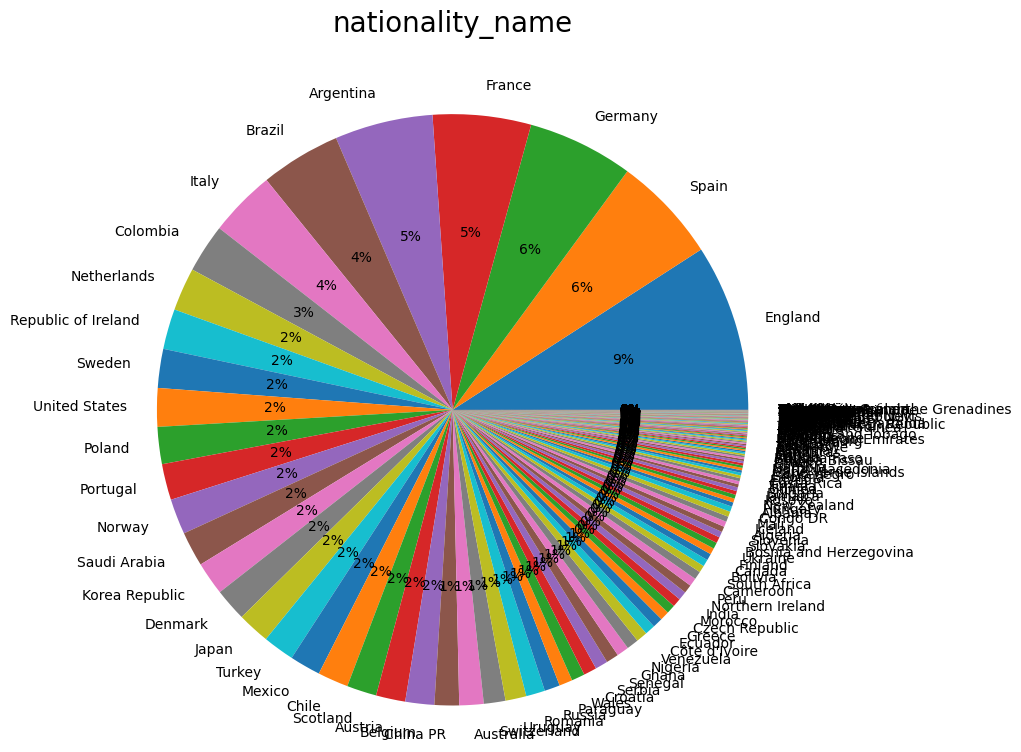

In [ ]:
df['nationality_name'].value_counts().plot.pie(autopct='%1.0f%%', radius=2, ylabel='')
plt.title('nationality_name', y=1.5, fontsize=20)
plt.show()

In [ ]:
print(f"Existen jugadores de {df['nationality_name'].nunique()} nacionalidades diferentes.")

Existen jugadores de 188 nacionalidades diferentes.


Agrupo los jugadores de países con pocos integrantes en un valor llamado 'Others':

In [ ]:
counts = df['nationality_name'].value_counts() / df.shape[0]
idx = counts[counts.lt(0.02)].index

df.loc[df['nationality_name'].isin(idx), 'nationality_name'] = 'Others'

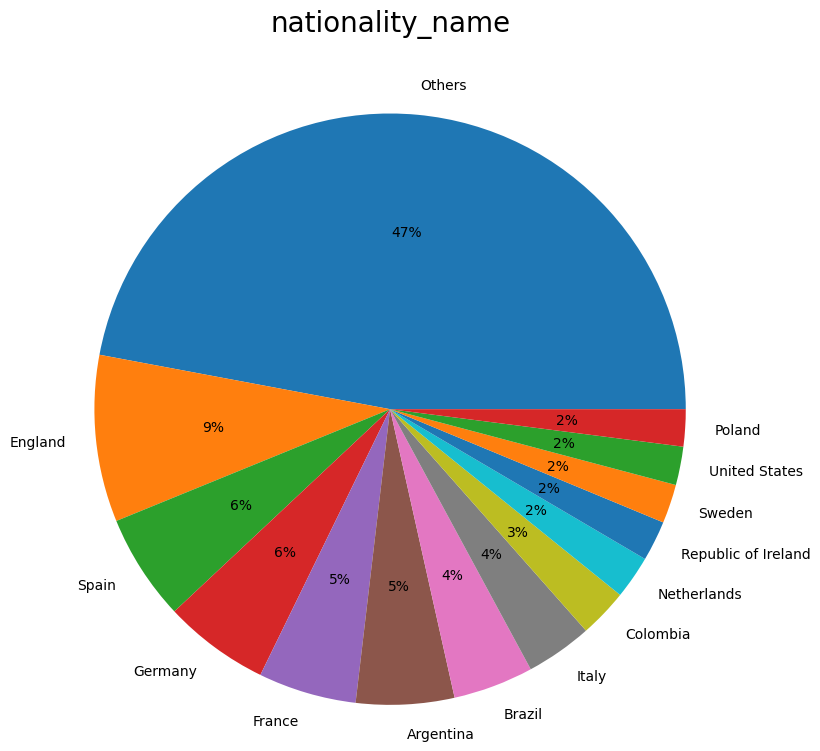

In [ ]:
df['nationality_name'].value_counts().plot.pie(autopct='%1.0f%%', radius=2, ylabel='')
plt.title('nationality_name', y=1.5, fontsize=20)
plt.show()

In [ ]:
print(f"Ahora, los jugadores están agrupados en {df['nationality_name'].nunique()} nacionalidades diferentes.")

Ahora, los jugadores están agrupados en 14 nacionalidades diferentes.


A continuación, voy a transformar los valores de la columna 'preferred_foot' para que sean valores numéricos. Esta columna lo que dice es qué pierna es la pierna hábil/predominante de cada futbolista.

In [ ]:
df['preferred_foot'].unique()

array(['Right', 'Left'], dtype=object)

In [ ]:
foot_oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
foot_oe.fit(df['preferred_foot'].values.reshape(-1, 1))
df['preferred_foot'] = foot_oe.transform(df['preferred_foot'].values.reshape(-1, 1))
df['preferred_foot'].head()

0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: preferred_foot, dtype: float64

Ahora, voy a transformar los valores de la columna 'work_rate', separando los dos valores que nos proporciona. En esta columna se puede observar los valores de: **Tasa de Trabajo en Ataque/Tasa de Trabajo en Defensa**. Lo que hago es separar eso dos valores en dos columnas independientes y borrar la original.

In [ ]:
df['work_rate'].head()

0         High/Low
1      High/Medium
2      High/Medium
3          Low/Low
4    Medium/Medium
Name: work_rate, dtype: object

In [ ]:
def convert_work_rate(x):
    attack_work_rate, defend_work_rate = x.split('/')
    return attack_work_rate, defend_work_rate

In [ ]:
df[['attack_work_rate', 'defend_work_rate']] = df['work_rate'].str.split('/', expand=True)
df.drop(columns='work_rate', inplace=True)
df.head()

,overall,potential,age,height_cm,weight_kg,nationality_name,preferred_foot,weak_foot,skill_moves,body_type,...,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,best_position,attack_work_rate,defend_work_rate
0,91,94,24,182,75,France,1.0,4,5,Unique,...,34,32,13,5,7,11,6,ST,High,Low
1,91,94,22,195,94,Others,0.0,3,3,Unique,...,47,29,7,14,13,11,7,ST,High,Medium
2,91,91,32,181,75,Others,1.0,5,4,Unique,...,70,53,15,13,5,10,13,CM,High,Medium
3,90,90,36,169,67,Argentina,0.0,4,4,Unique,...,35,24,6,11,15,14,8,ST,Low,Low
4,90,90,35,185,81,France,1.0,4,4,Normal (170-185),...,24,18,13,11,5,5,7,ST,Medium,Medium


Por último, al igual que con la columna de 'preferred_foot', codifico los valores convirtiendo las dos columnas en numéricas.

In [ ]:
work_rate_oe = OrdinalEncoder(categories=[['Low', 'Medium', 'High']],
                              handle_unknown='use_encoded_value', unknown_value=-1)
df['defend_work_rate'] = work_rate_oe.fit_transform(df['defend_work_rate'].values.reshape(-1,1))
df['attack_work_rate'] = work_rate_oe.fit_transform(df['attack_work_rate'].values.reshape(-1,1))
df.head()

,overall,potential,age,height_cm,weight_kg,nationality_name,preferred_foot,weak_foot,skill_moves,body_type,...,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,best_position,attack_work_rate,defend_work_rate
0,91,94,24,182,75,France,1.0,4,5,Unique,...,34,32,13,5,7,11,6,ST,2.0,0.0
1,91,94,22,195,94,Others,0.0,3,3,Unique,...,47,29,7,14,13,11,7,ST,2.0,1.0
2,91,91,32,181,75,Others,1.0,5,4,Unique,...,70,53,15,13,5,10,13,CM,2.0,1.0
3,90,90,36,169,67,Argentina,0.0,4,4,Unique,...,35,24,6,11,15,14,8,ST,0.0,0.0
4,90,90,35,185,81,France,1.0,4,4,Normal (170-185),...,24,18,13,11,5,5,7,ST,1.0,1.0


Ahora, una vez vista la forma de codificar los valores en números, codifico los valores de 'nationality_name' y 'body_type', ya que son las únicas columnas que siguen sin ser numéricas.

In [ ]:
ohe = OneHotEncoder(sparse_output=False).fit(df[['nationality_name', 'body_type']])
encoded_df = pd.DataFrame(data=ohe.transform(df[['nationality_name', 'body_type']]),
             columns=ohe.get_feature_names_out())

final_df = pd.merge(df.drop(columns=['nationality_name', 'body_type']), encoded_df, right_index=True, left_index=True)
final_df.head()

,overall,potential,age,height_cm,weight_kg,preferred_foot,weak_foot,skill_moves,attacking_crossing,attacking_finishing,...,body_type_Lean (170-),body_type_Lean (170-185),body_type_Lean (185+),body_type_Normal (170-),body_type_Normal (170-185),body_type_Normal (185+),body_type_Stocky (170-),body_type_Stocky (170-185),body_type_Stocky (185+),body_type_Unique
0,91,94,24,182,75,1.0,4,5,78,94,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,91,94,22,195,94,0.0,3,3,47,96,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,91,91,32,181,75,1.0,5,4,95,85,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,90,90,36,169,67,0.0,4,4,83,89,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,90,90,35,185,81,1.0,4,4,75,91,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180021 entries, 0 to 180020
Data columns (total 68 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   overall                               180021 non-null  int64  
 1   potential                             180021 non-null  int64  
 2   age                                   180021 non-null  int64  
 3   height_cm                             180021 non-null  int64  
 4   weight_kg                             180021 non-null  int64  
 5   preferred_foot                        180021 non-null  float64
 6   weak_foot                             180021 non-null  int64  
 7   skill_moves                           180021 non-null  int64  
 8   attacking_crossing                    180021 non-null  int64  
 9   attacking_finishing                   180021 non-null  int64  
 10  attacking_heading_accuracy            180021 non-null  int64  
 11  

 ## Diseño del modelo de datos y/o características que se quieren estudiar a partir de los mismos

In [ ]:
df.head()

,overall,potential,age,height_cm,weight_kg,nationality_name,preferred_foot,weak_foot,skill_moves,body_type,...,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,best_position,attack_work_rate,defend_work_rate
0,91,94,24,182,75,France,1.0,4,5,Unique,...,34,32,13,5,7,11,6,ST,2.0,0.0
1,91,94,22,195,94,Others,0.0,3,3,Unique,...,47,29,7,14,13,11,7,ST,2.0,1.0
2,91,91,32,181,75,Others,1.0,5,4,Unique,...,70,53,15,13,5,10,13,CM,2.0,1.0
3,90,90,36,169,67,Argentina,0.0,4,4,Unique,...,35,24,6,11,15,14,8,ST,0.0,0.0
4,90,90,35,185,81,France,1.0,4,4,Normal (170-185),...,24,18,13,11,5,5,7,ST,1.0,1.0


Extraigo del dataset la variable objetivo o target, que es la 'best_position', o posición principal del jugador. Además, selecciono las características (variables independientes) eliminando la columna 'best_position'.

In [ ]:
y = df['best_position']
X = final_df.drop(columns='best_position')

(180021, 67)

Divido el conjunto de datos en conjuntos de entrenamiento y prueba (75% entrenamiento, 25% prueba)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=14, stratify=y)

(135015, 67)
(45006, 67)


Creo un modelo de árbol de decisión con los hiperparámetros que mejores resultados me han dado y entreno el modelo con los conjuntos de entrenamiento

In [ ]:
model = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=10)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10)

Realizo predicciones en el conjunto de prueba

In [ ]:
y_pred = model.predict(X_test)

Calculo el Macro F1-score (una métrica de evaluación)

In [ ]:
print('Macro F1-score is %.2f' %f1_score(y_test, y_pred, average='macro'))

Macro F1-score is 0.74


Muestro la matriz de confusión

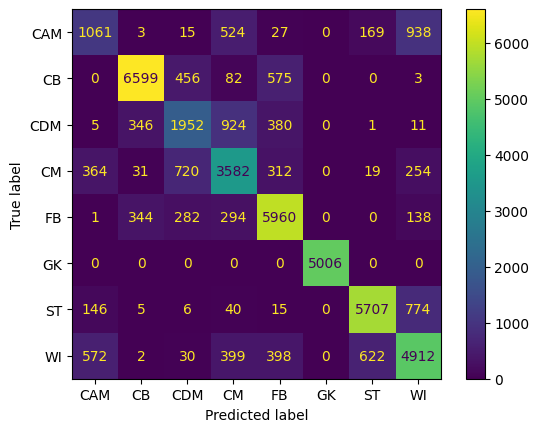

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

Muestro el informe de clasificación que incluye precision, recall y f1-score por clase

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         CAM       0.49      0.39      0.43      2737
          CB       0.90      0.86      0.88      7715
         CDM       0.56      0.54      0.55      3619
          CM       0.61      0.68      0.64      5282
          FB       0.78      0.85      0.81      7019
          GK       1.00      1.00      1.00      5006
          ST       0.88      0.85      0.86      6693
          WI       0.70      0.71      0.70      6935

    accuracy                           0.77     45006
   macro avg       0.74      0.73      0.74     45006
weighted avg       0.77      0.77      0.77     45006



Muestro la representación del árbol de decisiones en formato DOT (Graphviz)

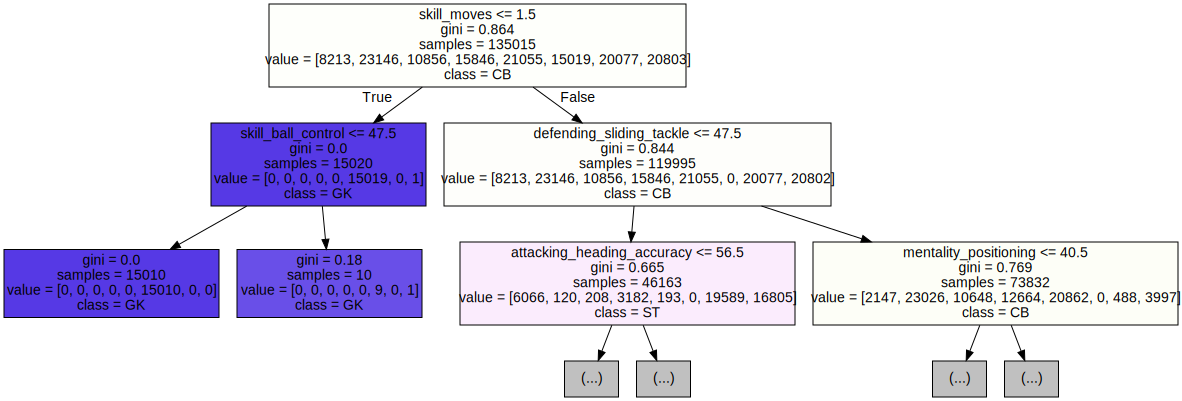

In [ ]:
dot_data = tree.export_graphviz(model, out_file=None,
                                max_depth=2,
                                feature_names=model.feature_names_in_,
                                class_names=model.classes_,
                                filled=True)

graph = graphviz.Source(dot_data)
graph

In [ ]:
print(f"La profundidad del árbol es: {model.get_depth()}.")

10

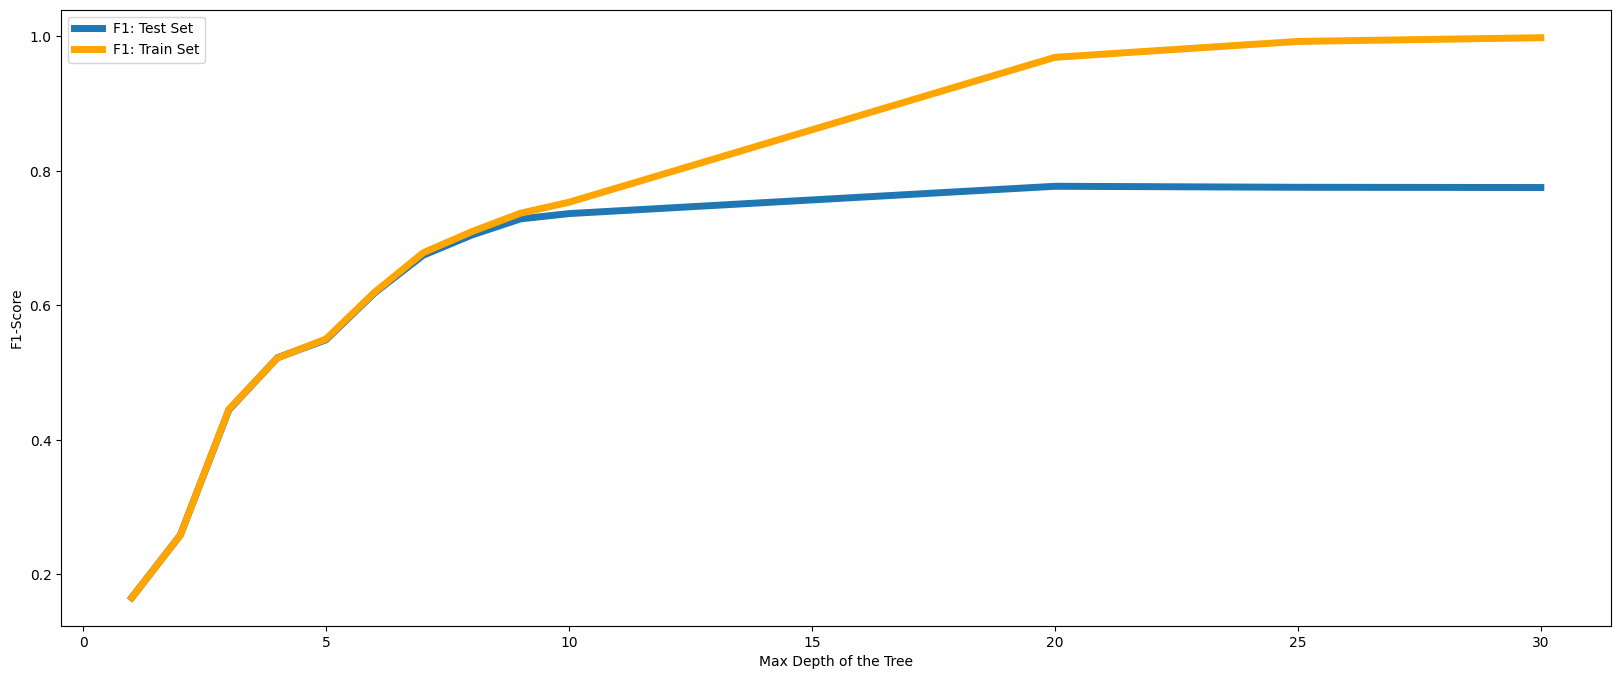

In [ ]:
scores = []
depths_list = [1,2,3,4,5,6,7,8,9,10,20,25,30]
scores = []
scores_train = []
for depth in depths_list:

    # Create the model
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    F1_train = f1_score(y_train, predictions_train, average='macro')
    scores_train.append(F1_train)

    predictions = model.predict(X_test)
    F1 = f1_score(y_test, predictions, average='macro')
    scores.append(F1)


# Plot the results
plt.figure(figsize=(20,8))
plt.plot(depths_list,scores,lw=5)
plt.plot(depths_list,scores_train,lw=5,color='orange')
plt.xlabel('Max Depth of the Tree')
plt.ylabel('F1-Score')
plt.legend(['F1: Test Set','F1: Train Set'])
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50, criterion='entropy',max_depth=10)
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=50)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score
print('Macro F1-score is %.2f' %f1_score(y_test, y_pred, average='macro'))

Macro F1-score is 0.74


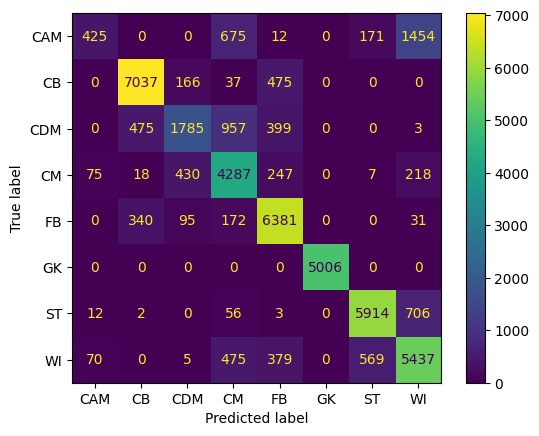

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         CAM       0.73      0.16      0.26      2737
          CB       0.89      0.91      0.90      7715
         CDM       0.72      0.49      0.59      3619
          CM       0.64      0.81      0.72      5282
          FB       0.81      0.91      0.86      7019
          GK       1.00      1.00      1.00      5006
          ST       0.89      0.88      0.89      6693
          WI       0.69      0.78      0.74      6935

    accuracy                           0.81     45006
   macro avg       0.80      0.74      0.74     45006
weighted avg       0.81      0.81      0.79     45006



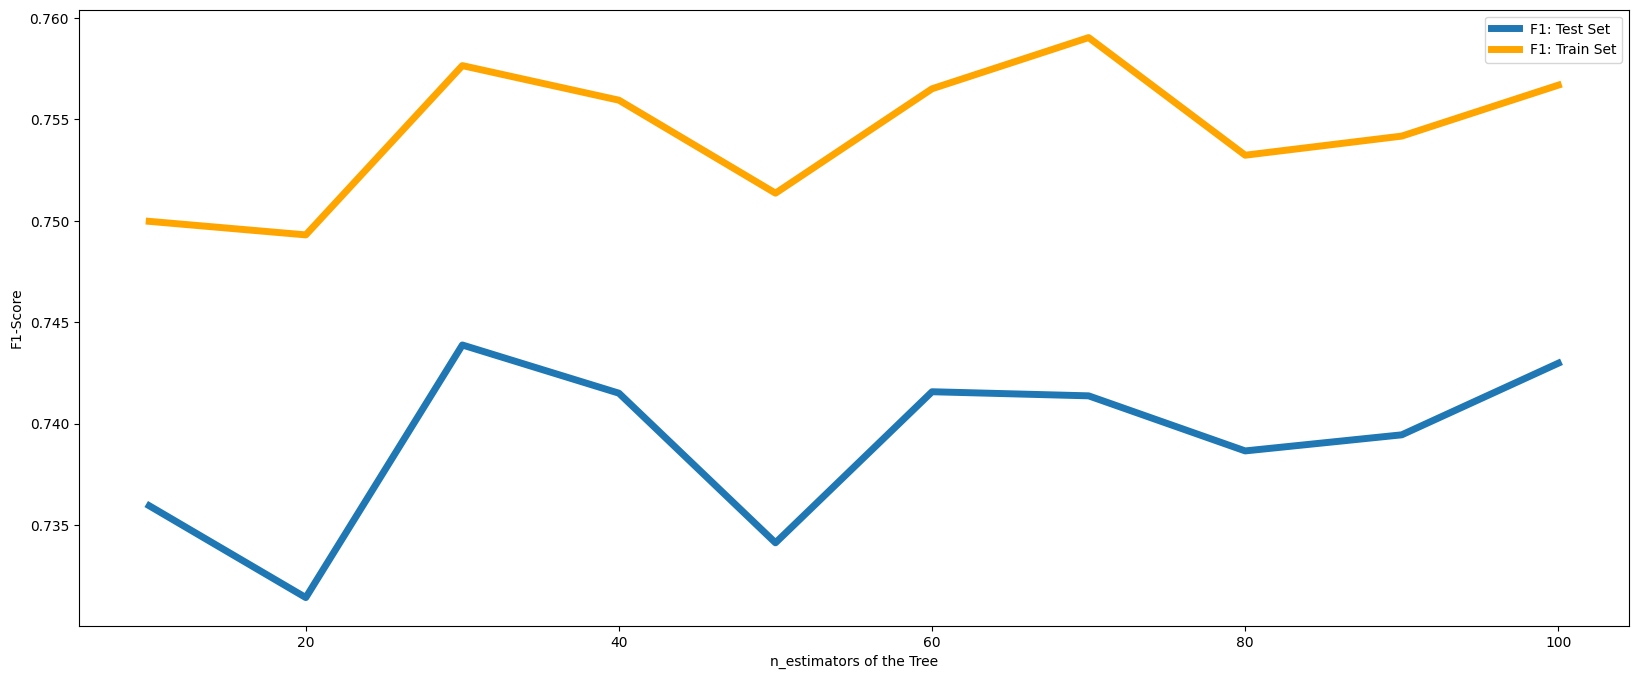

In [ ]:
scores = []
n_estimators = np.arange(start=10, stop=101, step=10)
scores = []
scores_train = []
for n_estimator in n_estimators:

    # Create the model
    model = RandomForestClassifier(n_estimators=n_estimator, max_depth=10)
    model.fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    F1_train = f1_score(y_train, predictions_train, average='macro')
    scores_train.append(F1_train)

    predictions = model.predict(X_test)
    F1 = f1_score(y_test, predictions, average='macro')
    scores.append(F1)


# Plot the results
plt.figure(figsize=(20,8))
plt.plot(n_estimators,scores,lw=5)
plt.plot(n_estimators,scores_train,lw=5,color='orange')
plt.xlabel('n_estimators of the Tree')
plt.ylabel('F1-Score')
plt.legend(['F1: Test Set','F1: Train Set'])
plt.show()


## XGBoost

In [ ]:
yoe = OrdinalEncoder().fit(y_train.values.reshape(-1,1))
yoe.transform(y_train.values.reshape(-1,1))
y_train_e, y_test_e = yoe.transform(y_train.values.reshape(-1,1)), yoe.transform(y_test.values.reshape(-1,1))

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=50, eval_metric=f1_score, device="cuda")
model.fit(X_train, y_train_e)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:51:13] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cuda', early_stopping_rounds=None,
              enable_categorical=False,
              eval_metric=<function f1_score at 0x7917b87d1f30>,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred = model.predict(X_test)
print('Macro F1-score is %.2f' %f1_score(y_test_e, y_pred, average='macro'))

Macro F1-score is 0.84


In [ ]:
y_pred = model.predict(X_test)

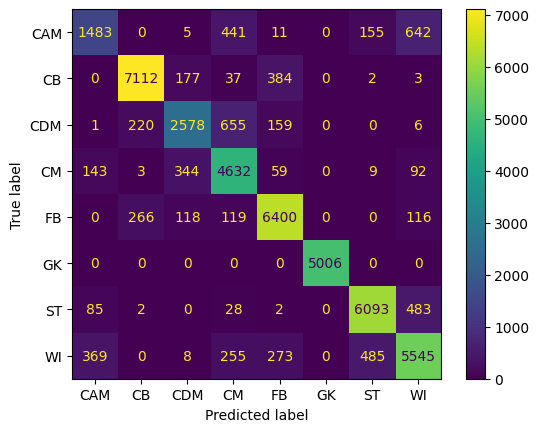

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, yoe.inverse_transform(y_pred.reshape(-1,1)))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yoe.inverse_transform(y_pred.reshape(-1,1))))

              precision    recall  f1-score   support

         CAM       0.71      0.54      0.62      2737
          CB       0.94      0.92      0.93      7715
         CDM       0.80      0.71      0.75      3619
          CM       0.75      0.88      0.81      5282
          FB       0.88      0.91      0.89      7019
          GK       1.00      1.00      1.00      5006
          ST       0.90      0.91      0.91      6693
          WI       0.81      0.80      0.80      6935

    accuracy                           0.86     45006
   macro avg       0.85      0.83      0.84     45006
weighted avg       0.86      0.86      0.86     45006



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:51:33] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:51:39] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:51:47] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:52:02] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:52:37] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.


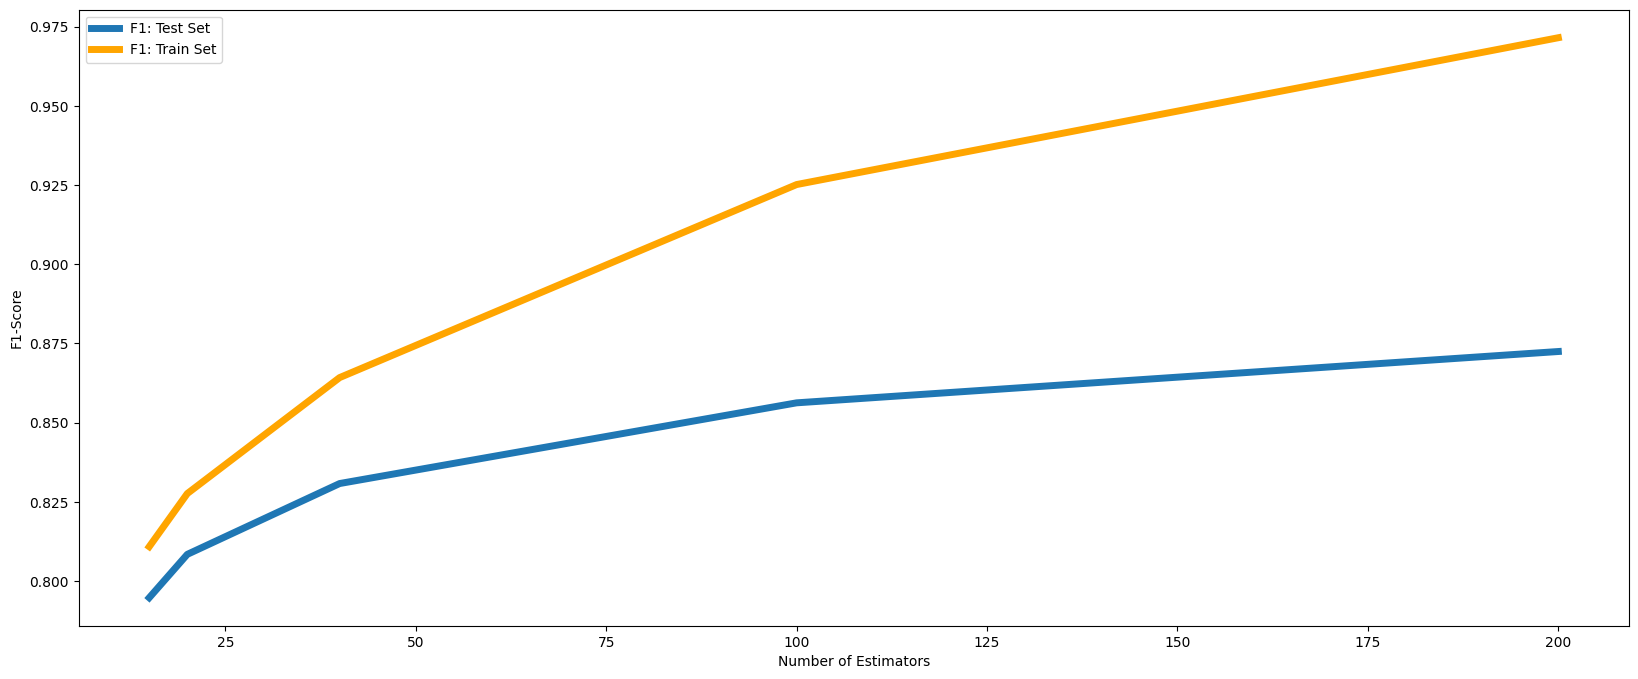

In [ ]:
scores = []
no_estimators = [15,20,40,100,200]
scores = []
scores_train = []
for no_estimator in no_estimators:

    # Create the model
    model = XGBClassifier(n_estimators=no_estimator, device="cuda")
    model.fit(X_train, y_train_e)
    predictions_train = model.predict(X_train)
    F1_train = f1_score(y_train_e, predictions_train, average='macro')
    scores_train.append(F1_train)

    predictions = model.predict(X_test)
    F1 = f1_score(y_test_e, predictions, average='macro')
    scores.append(F1)


# Plot the results
plt.figure(figsize=(20,8))
plt.plot(no_estimators,scores,lw=5)
plt.plot(no_estimators,scores_train,lw=5,color='orange')
plt.xlabel('Number of Estimators')
plt.ylabel('F1-Score')
plt.legend(['F1: Test Set','F1: Train Set'])
plt.show()


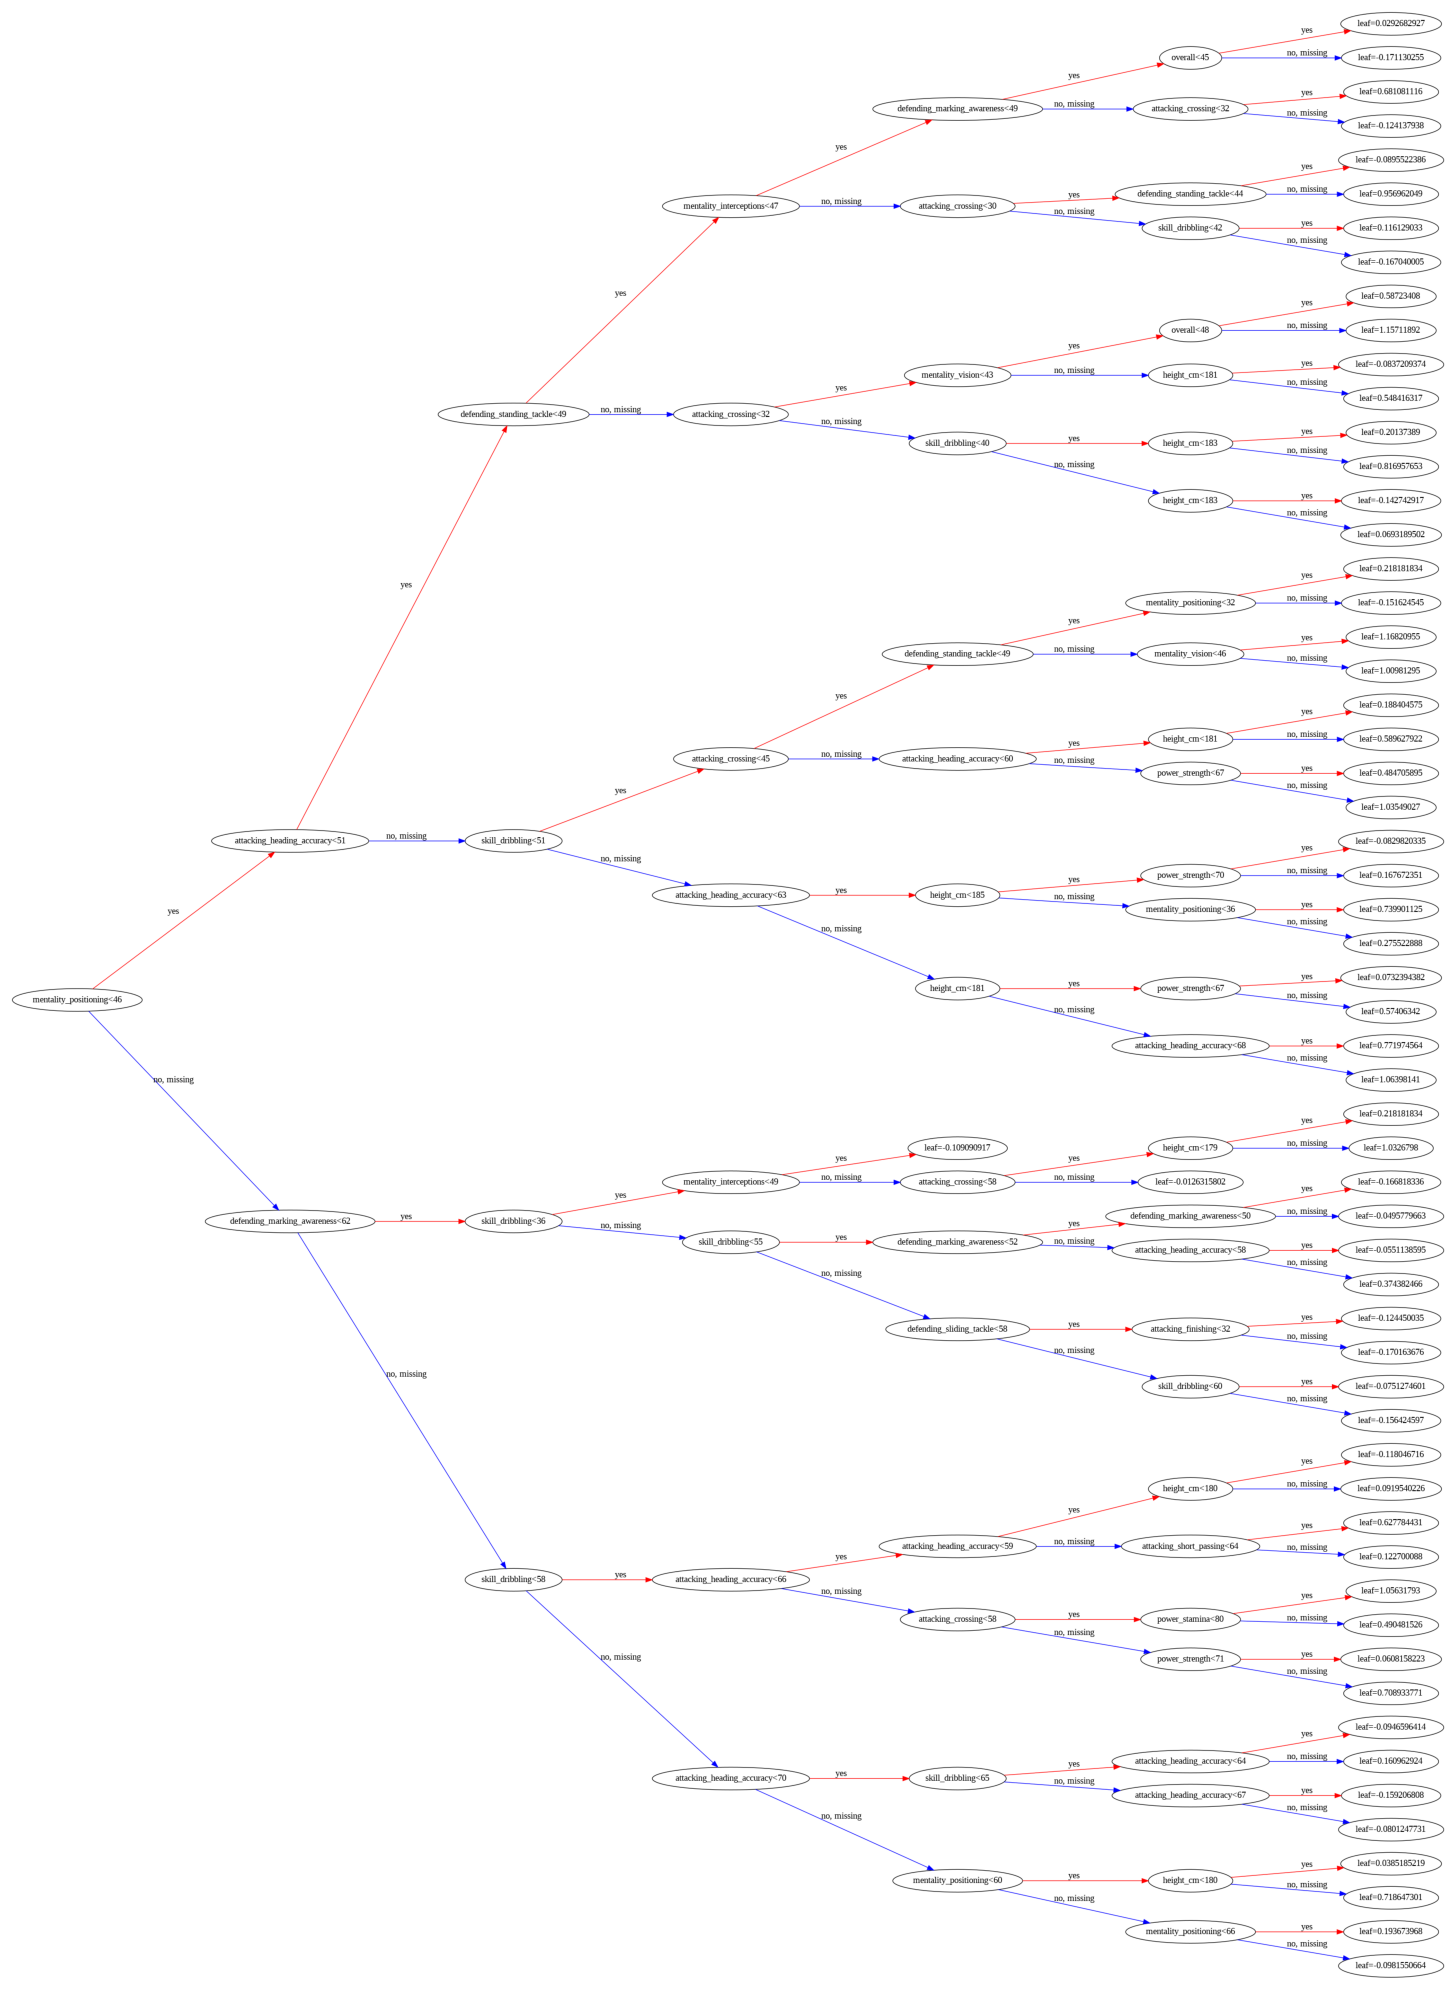

In [ ]:
from xgboost import plot_tree

fig, ax = plt.subplots(figsize=(20,20))
plot_tree(booster=model, num_trees=1, ax=ax, rankdir='LR')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Create the grid search parameter grid and scoring funcitons
# Credit: https://towardsdatascience.com/running-xgboost-on-google-colab-free-gpu-a-case-study-841c90fef101
param_grid = {
    "eta": [0.1, 0.01],
    "subsample": [0.6, 0.8, 1.0],
    "max_depth": [6],
    "n_estimators": [100, 200],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 0.3,0.6],
    "device": ["cuda"],
}

kfold = 5
n_iter = 5
scoring = "f1_macro"
grid = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
#     cv=kfold,
#     scoring=scoring,
#     n_jobs=-1,
    n_iter=n_iter,
    refit="AUC",
)
# fit grid search
%time best_model = grid.fit(X_train, y_train_e)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:53:46] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:54:44] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:55:25] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:55:56] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:56:34] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.


In [ ]:
y_pred = best_model.predict(X_test)
print('Macro F1-score is %.2f' %f1_score(y_test_e, y_pred, average='macro'))

In [ ]:
print('Max depth is: %d ' %best_model.best_estimator_.max_depth)
print('Gamma is: %.2f '  %best_model.best_estimator_.gamma)
print(best_model.best_estimator_.get_params())

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, yoe.inverse_transform(y_pred.reshape(-1,1)))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yoe.inverse_transform(y_pred.reshape(-1,1))))